In [44]:
!pip install pandas==1.4.2
!pip install matplotlib==3.5.2
!pip install seaborn==0.11.2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Change the file directory to yours, the files are in a public folder in google drive:
# https://drive.google.com/drive/folders/1CsvJs0xZ9SCLtG4ci2dNGCkhqnI-1DLS?usp=drive_link
df_train_valid = pd.read_parquet('/content/drive/MyDrive/2022/Orga_de_Datos/Datasets/train')

# GRAFICO 1 - SHARES SEGUN DATA CHANNEL

In [10]:
df_data_channel = df_train_valid[['data_channel_is_lifestyle',
                          'data_channel_is_entertainment',
                          'data_channel_is_bus',
                          'data_channel_is_socmed',
                          'data_channel_is_tech',
                          'data_channel_is_world']].copy()

In [11]:
df_data_channel.columns = df_data_channel.columns.str.replace('data_channel_is_', '')

In [12]:
df_data_channel = df_data_channel.idxmax(axis=1)

In [13]:
df_graph = df_train_valid[['shares']].copy()
df_graph['data_channel'] = df_data_channel

In [14]:
column_order = ['lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world']

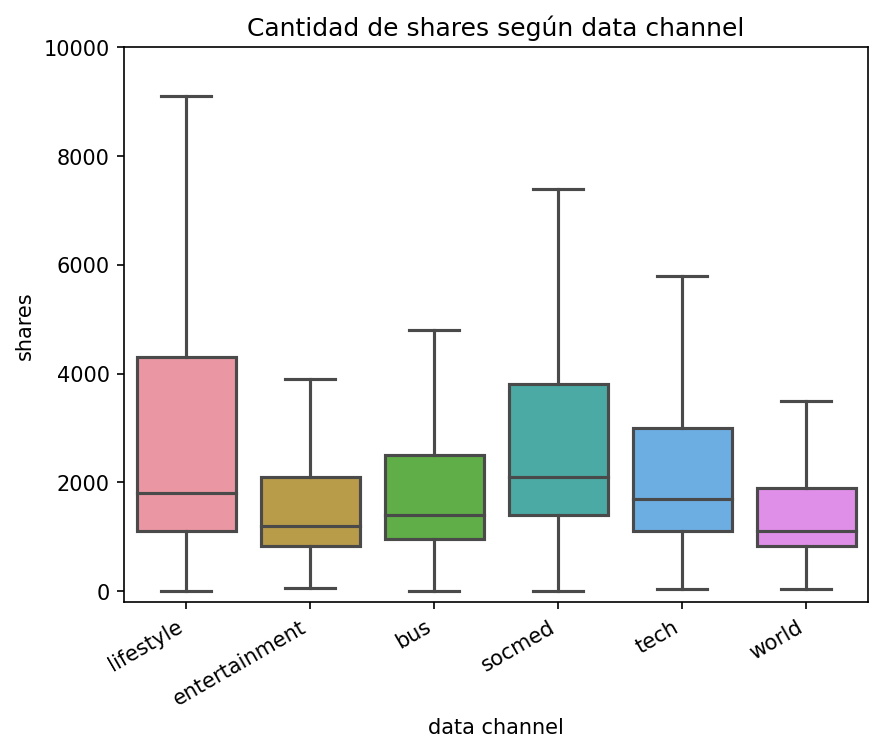

In [15]:
plt.figure(dpi=150)
plt.title("Cantidad de shares según data channel")

pal = ["#31a84e", "#9b59b6"]
sns.set_palette(pal)
ax = sns.boxplot(data=df_graph, x='data_channel', y='shares', order=column_order, showfliers = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_ylabel("shares")
ax.set_xlabel("data channel")
ax.set_ylim(-200, 10000)

plt.show()

# GRAFICO 2 - SHARES SEGUN DIA DE LA SEMANA

Si tengo tiempo hago un dataset que tenga la misma cantidad de noticias cada dia

In [16]:
df_weekday = df_train_valid[['weekday_is_monday',
                          'weekday_is_tuesday',
                          'weekday_is_wednesday',
                          'weekday_is_thursday',
                          'weekday_is_friday',
                          'weekday_is_saturday',
                          'weekday_is_sunday'
                          ]].copy()

In [17]:
df_weekday.columns = df_weekday.columns.str.replace('weekday_is_', '')

In [18]:
df_weekday = df_weekday.idxmax(axis=1)

In [19]:
df_graph = df_train_valid[['shares']].copy()
df_graph['weekday'] = df_weekday

In [20]:
df_graph = df_graph.groupby(['weekday']).agg({'shares':lambda x: sum(x)})

In [21]:
df_graph = df_graph.reset_index()

In [22]:
column_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

Text(0.5, 0, 'dia de la semana')

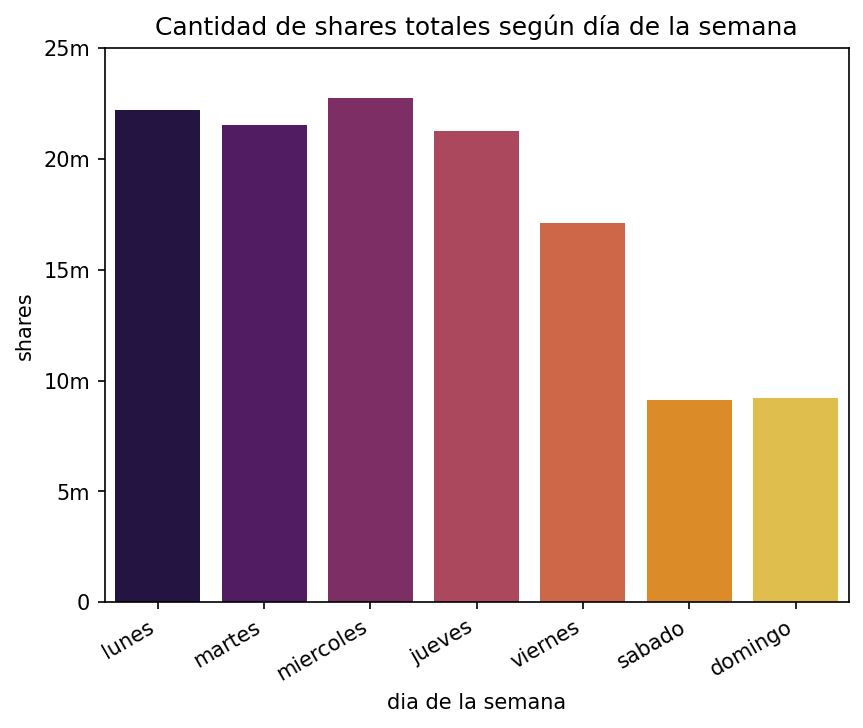

In [23]:
plt.figure(dpi=150)

plt.title("Cantidad de shares totales según día de la semana")
ax = sns.barplot(data=df_graph, x='weekday', y='shares', order=column_order, palette=sns.color_palette("inferno", n_colors=7))

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.xticks([0, 1, 2, 3, 4, 5, 6],['lunes','martes','miercoles','jueves','viernes','sabado','domingo'])
plt.yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000], ["0", "5m", "10m", "15m", "20m", "25m"])


ax.set_ylabel("shares")
ax.set_xlabel("dia de la semana")

# GRAFICO 3 - SHARES SEGUN MAYOR LDA

In [24]:
df_lda = df_train_valid[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']]
df_lda = df_train_valid[['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']].idxmax(axis=1)
df_graph = pd.DataFrame(df_train_valid['shares'])
df_graph['lda'] = df_lda

In [25]:
#df_graph = df_graph[df_graph['num_imgs'] < 26]
df_graph = df_graph[df_graph['shares'] < 7000]

Text(0.5, 0, 'Mayor LDA')

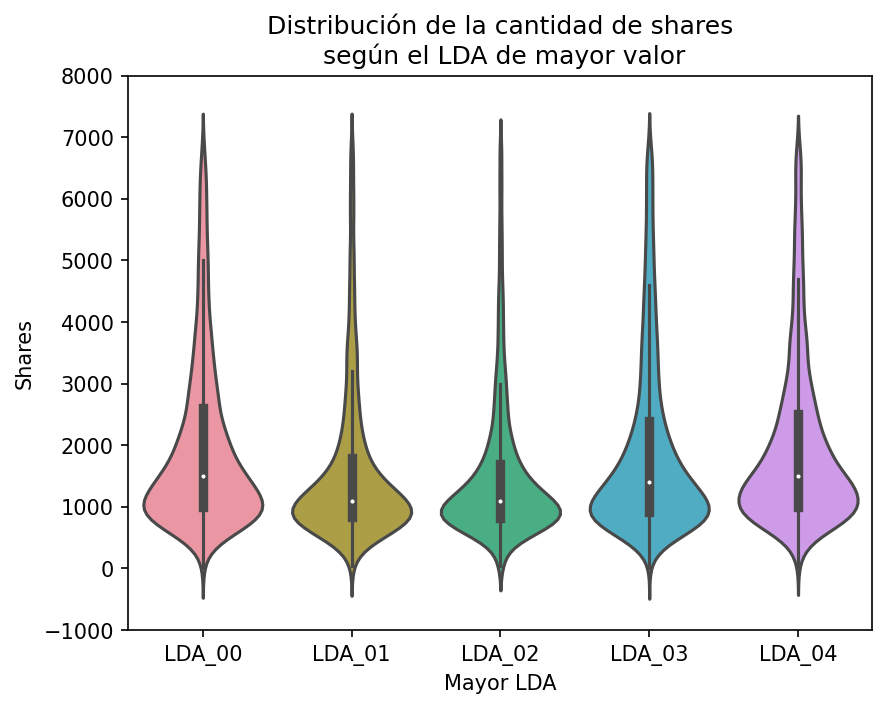

In [26]:
plt.figure(dpi=150)
plt.title("Distribución de la cantidad de shares\n según el LDA de mayor valor")

#pal = ["#C32912", "#C16557", "#7c83c3", "#2d3abb"]
#sns.set_palette(pal)
ax = sns.violinplot(data=df_graph, x='lda', y='shares', scale='width', order=['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04'])

#plt.yticks(range(0,1000000,200000), ["0", "200.000", "400.000", "600.000", "800.000"])
ax.set_ylim(-1000, 8000)
ax.set_ylabel("Shares")
ax.set_xlabel("Mayor LDA")

# GRAFICO 4 - CANTIDAD DE ARTÍCULOS PUBLICADOS SEGÚN EMOCIÓN Y SHARES

In [27]:
df_graph = df_train_valid[['surprise2','shares']].copy()

In [28]:
df_graph = df_graph[df_graph['surprise2'] != '']

In [29]:
df_graph['surprise2'] = df_graph.apply(lambda row : row['surprise2'].split(","), axis=1) #Convierto las categorias a listas

In [30]:
df_graph.reset_index(drop=True, inplace=True)

In [31]:
exploded_df = df_graph.explode('surprise2')

In [32]:
most_common = set(exploded_df.value_counts('surprise2').head(5).index)

In [33]:
df_graph['bins'] = pd.cut(x=df_graph['shares'], bins=[0, 1000, 1500, 3000, 1000000])

In [34]:
df_graph = df_graph.explode('surprise2')

In [35]:
df_graph['shares'] = 1

In [36]:
df_graph['surprise2'] = df_graph['surprise2'].astype(str)

In [37]:
df_graph = df_graph[df_graph.surprise2.isin(most_common)]

In [38]:
df_graph = (df_graph.groupby(['surprise2','bins']).agg('sum')
   .shares
   .unstack()
)

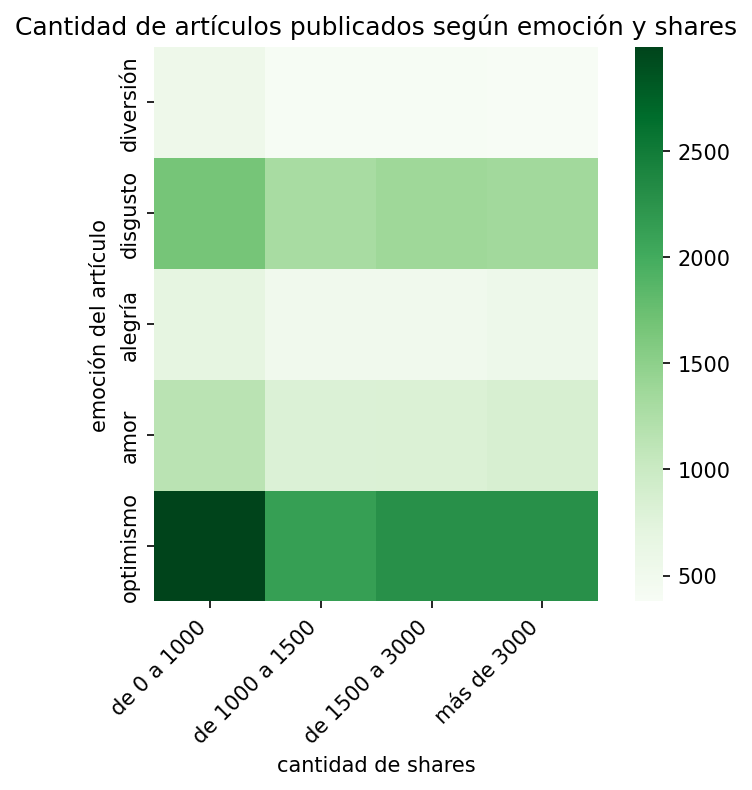

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=150)
plt.title("Cantidad de artículos publicados según emoción y shares")
ax = sns.heatmap(data=df_graph, square=True, cmap="Greens")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.xticks([0.5, 1.5, 2.5, 3.5],['de 0 a 1000','de 1000 a 1500','de 1500 a 3000','más de 3000'])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5],['diversión','disgusto','alegría','amor','optimismo'])

ax.set_ylabel("emoción del artículo")
ax.set_xlabel("cantidad de shares")

plt.show()

# GRAFICO 5 - DISTRIBUCION SHARES POR ARTÍCULO


In [40]:
df_graph = pd.DataFrame(df_train_valid['shares'])
df_graph['shares'] = df_graph.apply(lambda x : x['shares']/1000, axis = 1)

(0.0, 15.0)

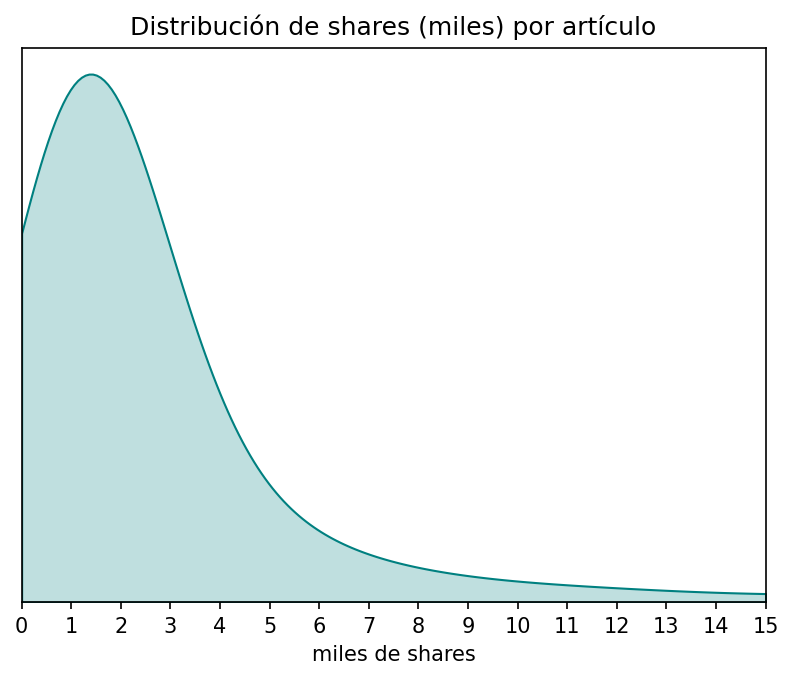

In [41]:
plt.figure(dpi=150)
plt.xticks(range(0,16,1))

plt.title("Distribución de shares (miles) por artículo")
ax = sns.kdeplot(df_graph['shares'], color="teal", shade=True, clip=(0,15))
ax.get_yaxis().set_visible(False)

ax.grid(False)
sns.set_style("ticks")
ax.set_ylabel("")
ax.set_xlabel("miles de shares")
ax.set_xlim(0, 15)

# GRAFICO 6 - CORRELACIÓN DE CANTIDAD DE SHARES SEGÚN LA POLARIZACIÓN DEL SENTIMIENTO DEL TEXTO

In [42]:
df_graph = df_train_valid.sample(300)

Text(0.5, 0, 'Polarización')

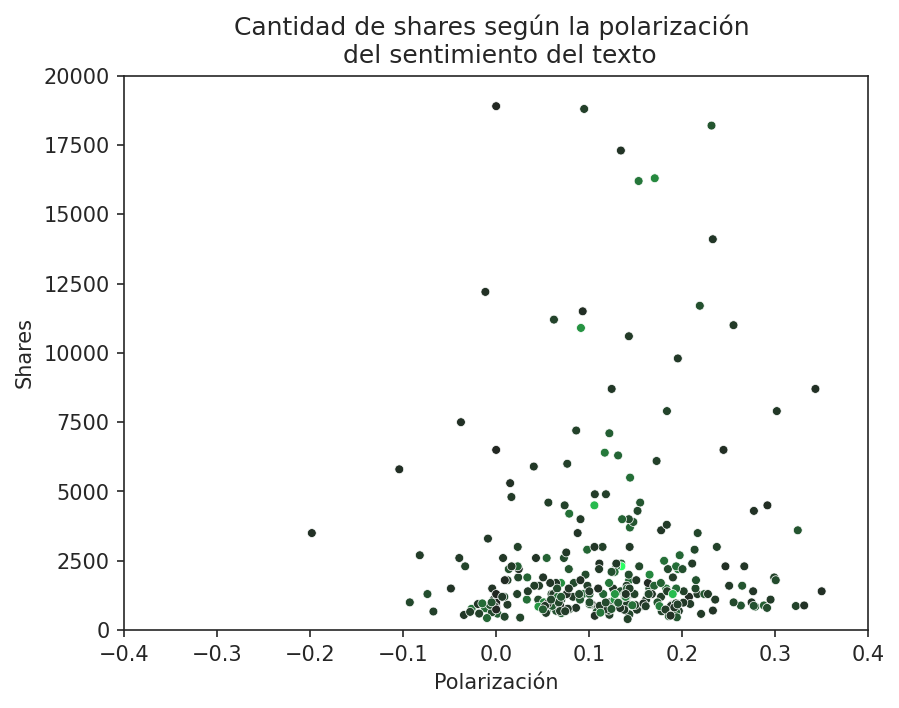

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=150)
plt.title("Cantidad de shares según la polarización \n del sentimiento del texto")
graph_palette = sns.dark_palette("#2aff62", as_cmap=True)
ax = sns.scatterplot(data=df_graph, x='global_sentiment_polarity', y='shares', size=0.5, legend = False, palette=graph_palette, hue='n_tokens_content')

ax.set_ylim(0, 20000)
ax.set_xlim(-0.4, 0.4)
ax.set_ylabel("Shares")
ax.set_xlabel("Polarización")